In [1]:
from tensorflow import keras

In [2]:
model = keras.models.load_model("../Data/best_cnn_model.keras")

In [3]:
# model의 layer확인
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

#### kernel size(3,3)으로 구성된 이미지 보기

In [4]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [5]:
# 가중치 보기
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.042607203 0.2898202


In [6]:
conv_weights

array([[[[ 0.04806571,  0.08700728, -0.13358504,  0.06113891,
          -0.10955676, -0.07952446, -0.03126313,  0.16919892,
           0.08080135, -0.16674602,  0.07424983,  0.25505337,
          -0.21589908,  0.4534631 , -0.09288046,  0.10716782,
          -0.12736729,  0.07234486,  0.01722867,  0.20179197,
          -0.30641752,  0.05715642, -0.27963275, -0.16760916,
          -0.23903133, -0.09478657,  0.18451585, -0.14048246,
           0.07255661, -0.1859368 ,  0.01275797, -0.23246136]],

        [[ 0.07379626,  0.520225  , -0.23959857,  0.01151737,
          -0.15350284, -0.14679137,  0.25631437, -0.00332301,
          -0.27102152,  0.00548518, -0.0831557 ,  0.42271176,
           0.10190743, -0.11316466, -0.0243891 ,  0.09831883,
          -1.1765422 , -0.11501439,  0.10011854,  0.03510189,
          -1.303324  , -0.12308472,  0.12977092,  0.00858908,
           0.14455885, -0.18381378, -0.25611305, -0.38686612,
          -0.4272613 ,  0.35582006,  0.10641446,  0.25678888]],

  

In [7]:
import matplotlib.pyplot as plt

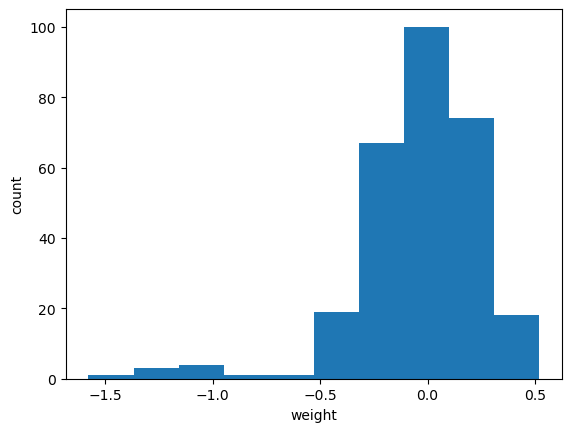

In [8]:
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

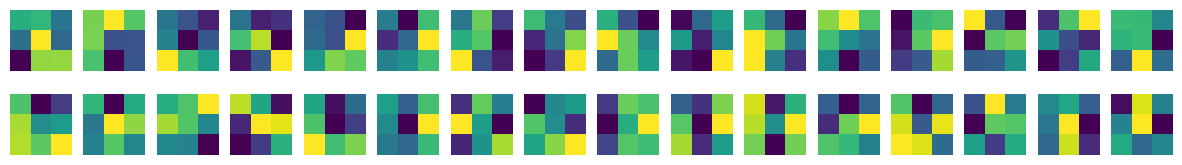

In [9]:
# 이미지로 확인하기
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j])
        axs[i, j].axis('off')

plt.show()

#### 특성맵 시각화

In [10]:
model.layers[0].input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer>

In [11]:
(train_input, train_target),(test_input, test_target) = \
                    keras.datasets.fashion_mnist.load_data()

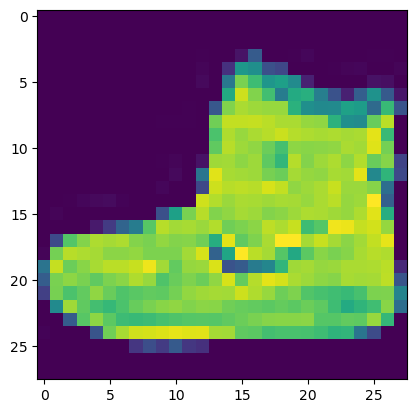

In [12]:
plt.imshow(train_input[0])
plt.show()

In [13]:
# Model 불러오기
conv_acti = keras.models.Model(
    model.layers[0].input,
    model.layers[0].output
)

In [14]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_map = conv_acti.predict(inputs)
print(feature_map.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
(1, 28, 28, 32)


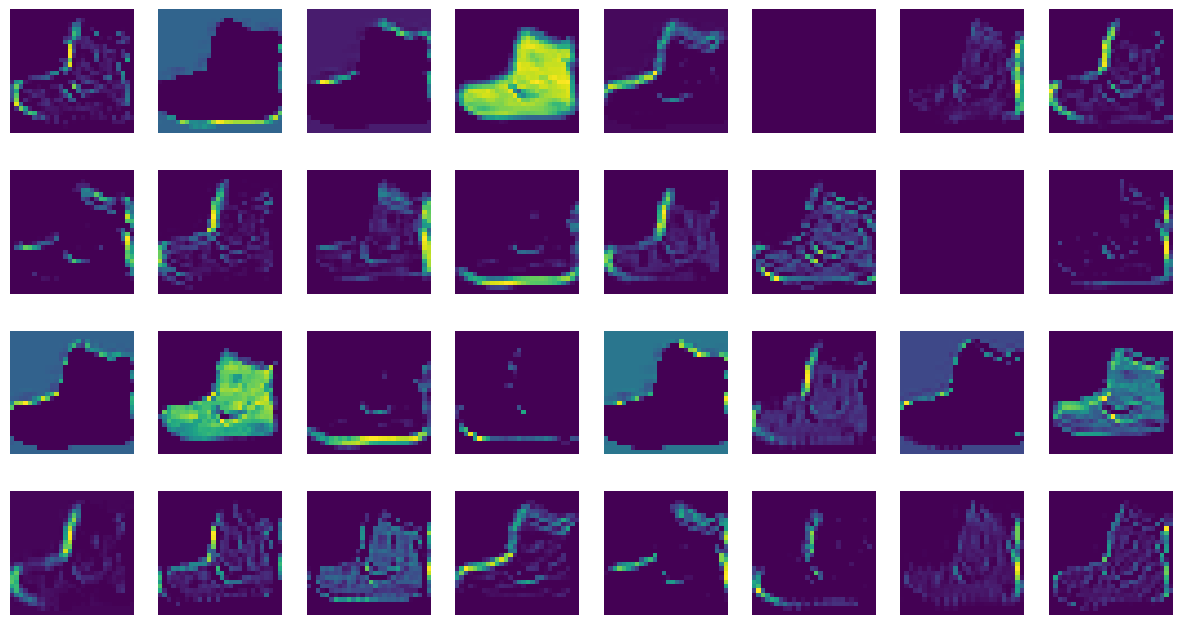

In [15]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_map[0,:,:,i*8+j])
        axs[i,j].axis('off')

plt.show()

#### Max Pooling

In [16]:
conv2_acti = keras.models.Model(model.layers[0].input, model.layers[2].output)

In [17]:
feature_map = conv2_acti.predict(inputs)
print(feature_map.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
(1, 14, 14, 64)


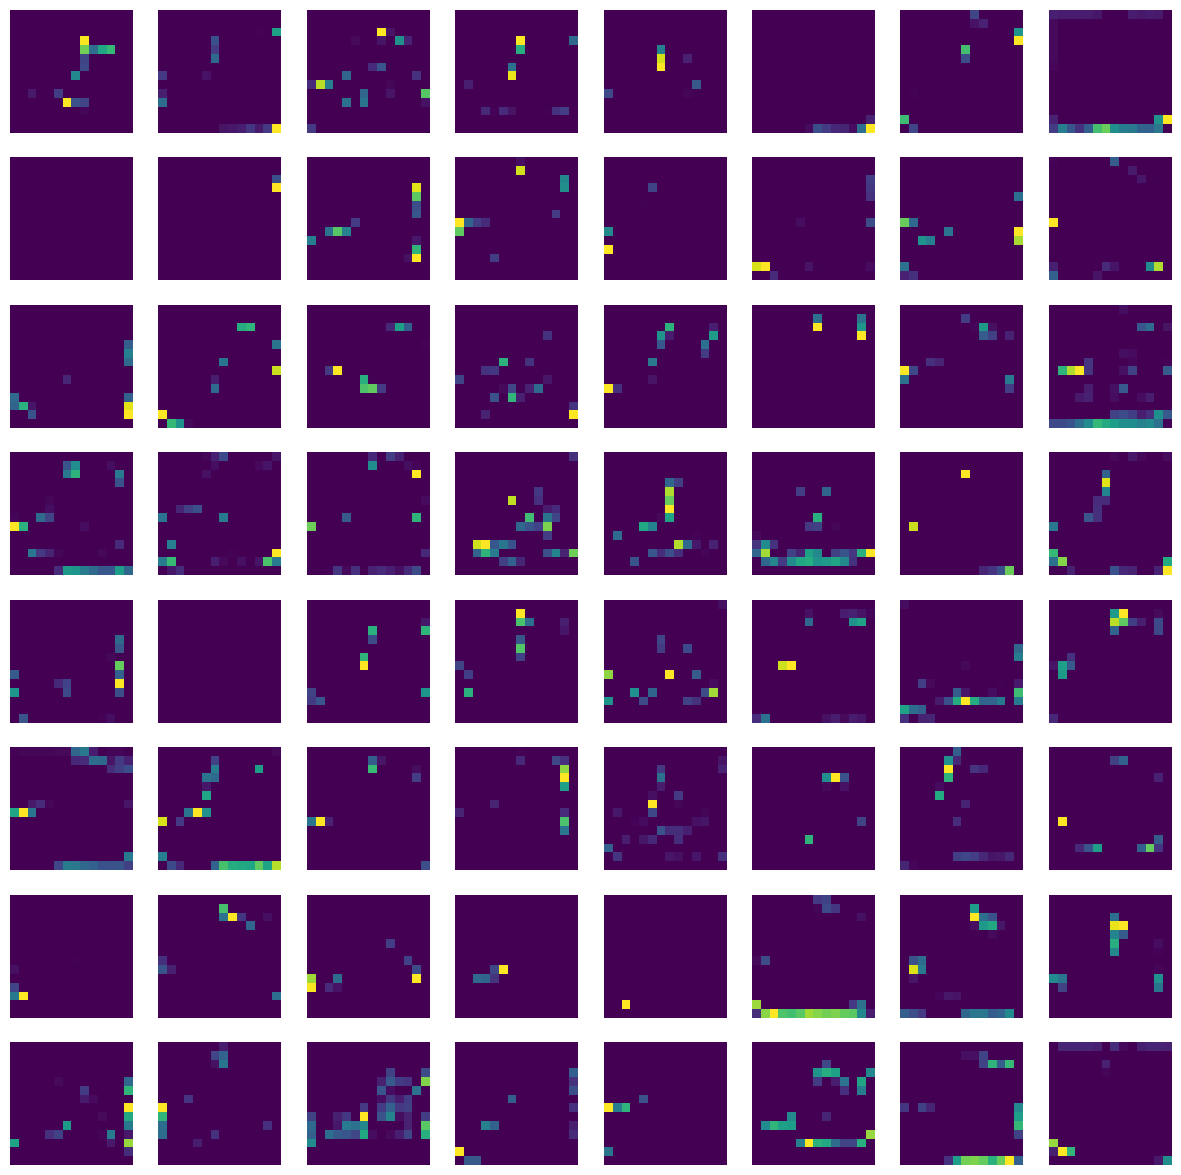

In [18]:
fig, axs = plt.subplots(8, 8, figsize=(15,15))

for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_map[0,:,:,i*8+j])
        axs[i,j].axis('off')

plt.show()